# Hands-on practice lab: Model Development

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [33]:
file_name="laptops.csv"
df = pd.read_csv(file_name, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Task-1: Single Linear Regression

#### You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [34]:
lm = LinearRegression()
lm

LinearRegression()

In [35]:
X = df[['CPU_frequency']]
Y = df['Price']

In [36]:
lm.fit(X,Y)

LinearRegression()

In [37]:
Y_hat = lm.predict(X)

#### Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

(0.0, 3974.15)

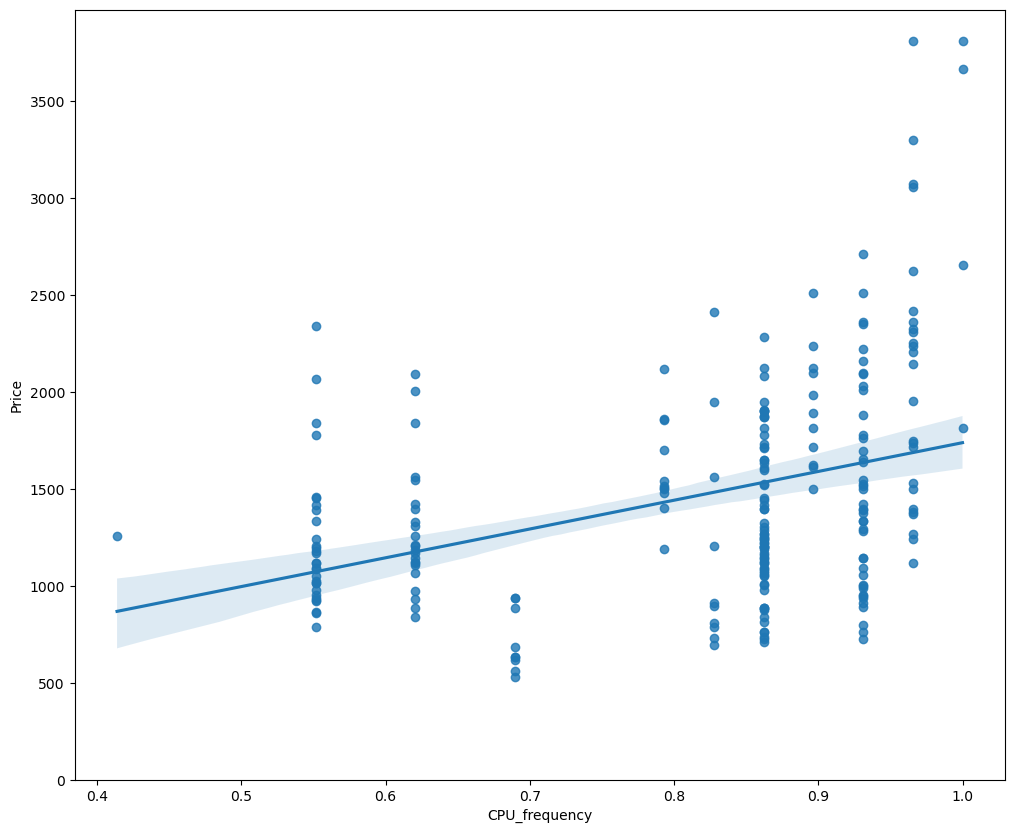

In [38]:
width= 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='CPU_frequency',y='Price',data=df)
plt.ylim(0,)

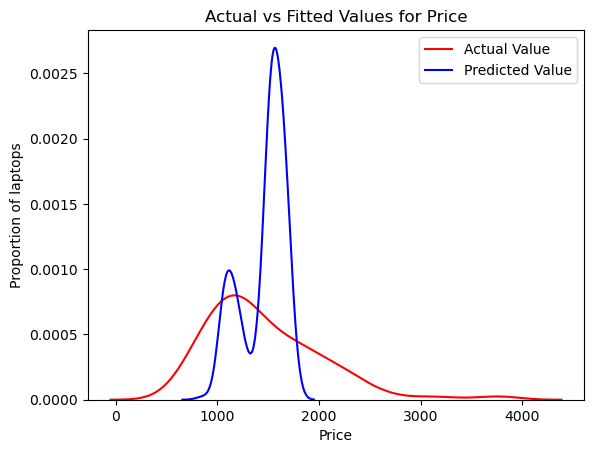

In [39]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

#### Evaluate the Mean Squared Error and R^2 score values for the model.

In [40]:
mse = mean_squared_error(df['Price'],Y_hat)
print('The mean squared error:', mse)

The mean squared error: 284583.4405868629


In [41]:
print('The R-square is:', lm.score(X,Y))

The R-square is: 0.1344436321024326


## Task 2 - Multiple Linear Regression

#### The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [42]:
Y = df['Price']
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm.fit(Z,Y)
Y_hat = lm.predict(Z)

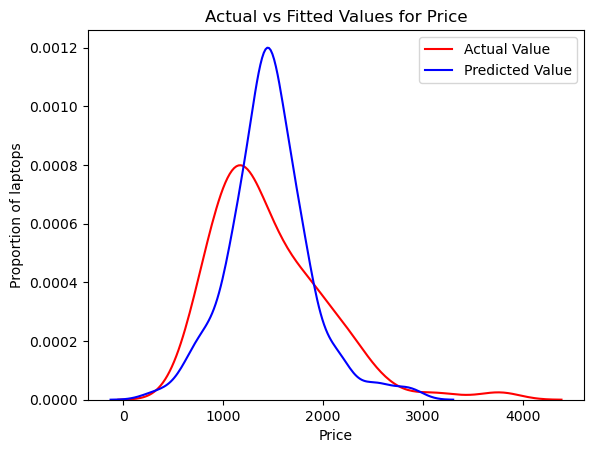

In [43]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

#### Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?

In [44]:
mse_slr = mean_squared_error(df['Price'], Y_hat)
r2_score_slr = lm.score(Z, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.5082509055187374
The mean square error of price and predicted value is:  161680.57263893107


## Task 3 - Polynomial Regression

#### Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit

#### Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.

In [53]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

In [54]:
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

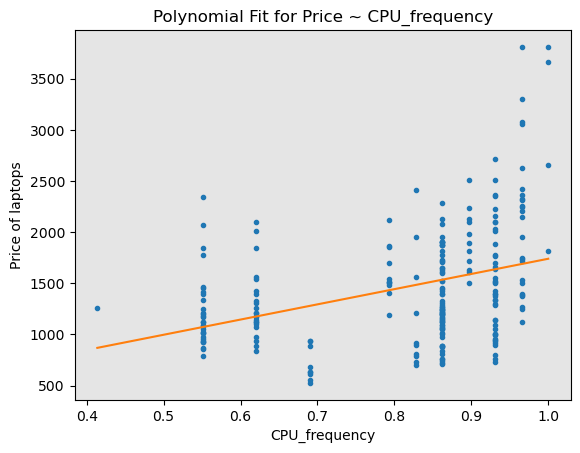

In [55]:
PlotPolly(p1, X, Y, 'CPU_frequency')

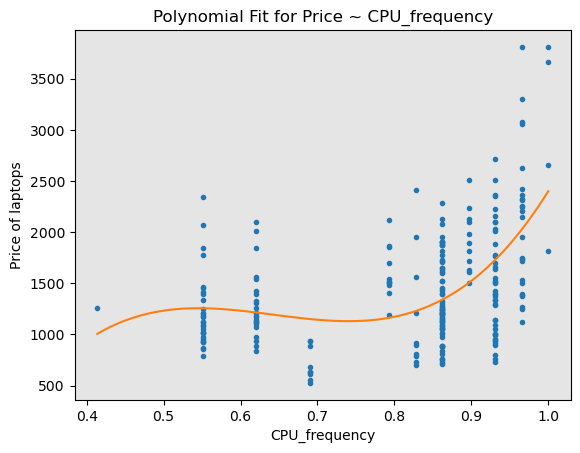

In [56]:
PlotPolly(p3, X, Y, 'CPU_frequency')

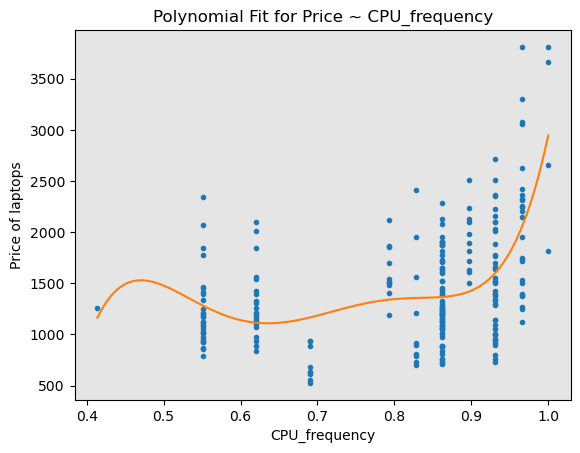

In [57]:
PlotPolly(p5, X, Y, 'CPU_frequency')

## Task 4 - Pipeline

#### Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.

In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

#### Evaluate the MSE and R^2 values for the this predicted output.

In [65]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  123299.09033613445
R^2 for multi-variable polynomial pipeline is:  0.624987621991154
